In [29]:
import json
import seaborn as sns

In [15]:
with open('results.json') as f:
    raw_data = f.readlines()

In [16]:
raw_data

['{"tasks": 1000000, "chunkcount": 1, "time": 11.337035417556763, "workers": 2, "task_dur_s": 1e-05}\n',
 '{"tasks": 1000000, "chunkcount": 2, "time": 6.539937973022461, "workers": 2, "task_dur_s": 1e-05}\n',
 '{"tasks": 1000000, "chunkcount": 4, "time": 6.534830808639526, "workers": 2, "task_dur_s": 1e-05}\n',
 '{"tasks": 1000000, "chunkcount": 8, "time": 6.208547353744507, "workers": 2, "task_dur_s": 1e-05}\n',
 '{"tasks": 1000000, "chunkcount": 16, "time": 6.05049729347229, "workers": 2, "task_dur_s": 1e-05}\n',
 '{"tasks": 1000000, "chunkcount": 1, "time": 11.31022596359253, "workers": 2, "task_dur_s": 1e-05}\n',
 '{"tasks": 1000000, "chunkcount": 2, "time": 6.49355411529541, "workers": 2, "task_dur_s": 1e-05}\n',
 '{"tasks": 1000000, "chunkcount": 4, "time": 6.5208070278167725, "workers": 2, "task_dur_s": 1e-05}\n',
 '{"tasks": 1000000, "chunkcount": 8, "time": 6.3920979499816895, "workers": 2, "task_dur_s": 1e-05}\n',
 '{"tasks": 1000000, "chunkcount": 16, "time": 6.4831099510192

In [17]:
cdata = {}

for line in raw_data:
    j = json.loads(line)
    w = j['workers']
    chunkcount=j['chunkcount']
    t = j['time']
    if w not in cdata:
        cdata[w] = {1:99999, 2:99999, 4:99999, 8:99999, 16:99999}
    cdata[w][chunkcount] = min(cdata[w][chunkcount], t) 

In [20]:
for i in cdata:
    print(i, cdata[i])

2 {1: 11.310042381286621, 2: 6.018977880477905, 4: 6.488682270050049, 8: 6.208547353744507, 16: 6.05049729347229}
1 {1: 11.363102436065674, 2: 10.602078199386597, 4: 10.886100769042969, 8: 11.265276193618774, 16: 11.07891321182251}
4 {1: 10.884008407592773, 2: 6.200960636138916, 4: 3.828669548034668, 8: 3.7763102054595947, 16: 5.079753875732422}


In [21]:
import matplotlib.pyplot as plt

[11.363102436065674, 10.602078199386597, 10.886100769042969, 11.265276193618774, 11.07891321182251]


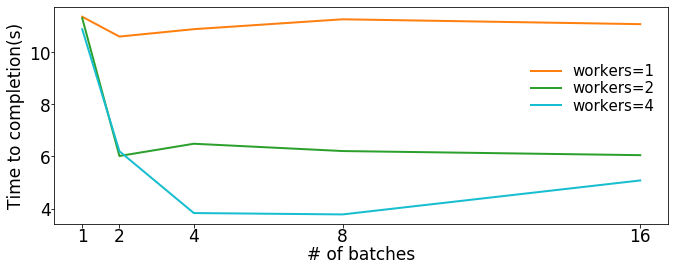

In [52]:
fig, ax = plt.subplots(figsize=(11,4))


xdata = [1,2,4,8,16]
ydata = [cdata[1][i] for i in xdata]
print(ydata)
plt.plot(xdata, ydata, 
         label='workers=1', c=sns.color_palette()[1], linewidth=2)
ydata = [cdata[2][i] for i in xdata]
plt.plot(xdata, ydata, 
         label='workers=2', c=sns.color_palette()[2], linewidth=2)
ydata = [cdata[4][i] for i in xdata]
plt.plot(xdata, ydata, 
         label='workers=4', c=sns.color_palette()[9], linewidth=2)
legend = plt.legend(loc='upper right', 
                    ncol=1, 
                    bbox_to_anchor=(1, 0.8), 
                    columnspacing=-0.2,
                    labelspacing=0.15,
                    fancybox=True, frameon=True, fontsize=15, framealpha=0)
plt.setp(legend.get_texts(), color='black')
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_linewidth(1)
ax.tick_params(axis='y', which='minor')
ax.tick_params(axis='both', which='major', pad=0, labelsize=17, labelcolor='black')
ax.set_xticks(xdata)
ax.set_ylabel('Time to completion(s)', fontsize=17, color='black')
ax.set_xlabel('# of batches', labelpad=0, fontsize=17, color='black')
plt.savefig('map_primitives.png', 
            bbox_inches = "tight", 
            dpi=1000)

In [53]:
!cp map_primitives.png ~/src/HPDC20/Figures/

In [54]:
print(cdata[4])

{1: 10.884008407592773, 2: 6.200960636138916, 4: 3.828669548034668, 8: 3.7763102054595947, 16: 5.079753875732422}
